#### Import necessary modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Loading Handwritten datasets from keras library

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#Number of training samples
len(X_train)

60000

In [4]:
#Number of testing samples
len(X_test)

10000

In [5]:
#Shape of each sample
X_train[0].shape

(28, 28)

In [6]:
#Each sample is a 2D array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

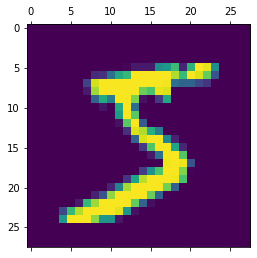

In [7]:
#First sample is look like 
plt.matshow(X_train[0])
#plt.matshow(X_train[1])
#plt.matshow(X_train[2])
#plt.matshow(X_train[3])
#plt.matshow(X_train[4])
#plt.matshow(X_train[5])
#plt.matshow(X_train[6])
#plt.matshow(X_train[7])
#plt.matshow(X_train[8])
#plt.matshow(X_train[9])


In [8]:
#At position 0 it is 5
y_train[0]

5

In [9]:
#Overall y_train, here first 5 elements of y_train
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
#Scaling
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [66]:
X_train_flattened.shape

(60000, 784)

In [67]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### FFNN without hidden layer i.e. with only input and output layers

In [68]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # 10=o/p class,784=i/p,sigmoid=activation func in o/p
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4699 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9260


In [69]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9262


[0.2658442258834839, 0.9261999726295471]

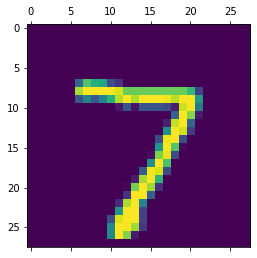

In [87]:
plt.matshow(X_test[0])

In [88]:
#Printing digit at position 0 i.e. 7
#Ten scores represents 10 classes and the fire(more value) should be at position 7
y_predicted = model.predict(X_test_flattened) #this is an array
y_predicted[0]

array([3.19699943e-02, 3.39073523e-07, 7.75709152e-02, 9.61267591e-01,
       2.09420919e-03, 1.13565356e-01, 1.84599207e-06, 9.99786794e-01,
       1.04180217e-01, 6.43909812e-01], dtype=float32)

#### np.argmax finds a maximum element from an array and returns the index of it

In [89]:
np.argmax(y_predicted[0])

7

In [90]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [91]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [93]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm #A confusion matrix is a summary of prediction results on a classification problem.

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    1,    3,    0],
       [   0, 1110,    4,    1,    0,    1,    4,    2,   13,    0],
       [   5,    9,  928,   15,    7,    3,   12,    9,   41,    3],
       [   2,    0,   22,  916,    0,   27,    2,   11,   23,    7],
       [   1,    1,    3,    1,  911,    0,   13,    4,   11,   37],
       [   9,    2,    3,   28,    9,  779,   15,    6,   35,    6],
       [  12,    3,    5,    1,    7,   13,  913,    2,    2,    0],
       [   1,    5,   23,    6,    8,    1,    0,  950,    4,   30],
       [   5,    8,    6,   17,    9,   25,    8,   10,  880,    6],
       [  10,    7,    1,   10,   28,    6,    0,   21,   12,  914]])>

Text(69.0, 0.5, 'Truth')

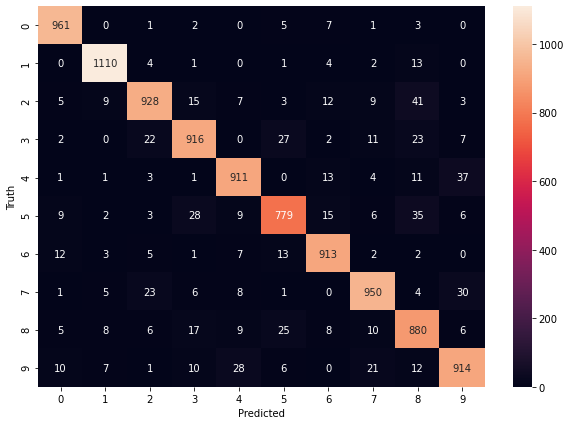

In [96]:
#For appealing visual of confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#Here except the diagonal all the values are error
#961 times the value=0, model predict=0
#1110 times the value=1, model predict=1
#928 times the value =2, model predict 9 time=1
#916 times the value=3, model predict 22 time=2 and so on(more error in the mark black square i.e 41,22,27,23 and more)

### Using hidden layer

In [97]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), 
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)
#100 is hidden layer applied in input layer dense

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9834


In [98]:
#Hidden layer increase accuracy
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0821 - accuracy: 0.9750


[0.08206780254840851, 0.9750000238418579]

Text(69.0, 0.5, 'Truth')

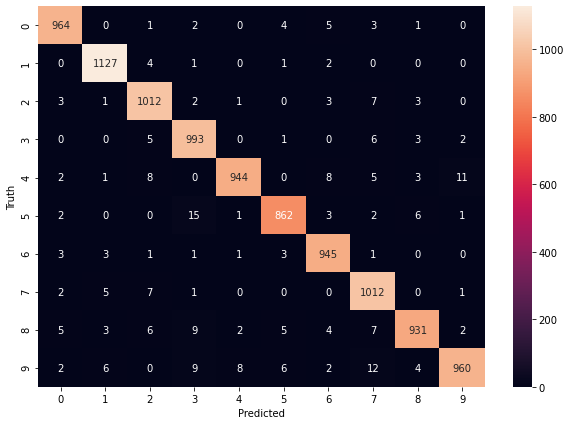

In [99]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#The errors are lessened 

#### Using Flatten layer so that we don't have to call .reshape on input dataset

In [100]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1288 - accuracy: 0.96 - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 10/10
1875/1875 [=================

In [101]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.9768


[0.09101126343011856, 0.9768000245094299]

#### Optimizer that implements the Adam algorithm. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#### Available optimizers are SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam and Ftrl
#### Adadelta: Optimizer that implements the Adadelta algorithm.
#### Adagrad: Optimizer that implements the Adagrad algorithm.
#### Adam: Optimizer that implements the Adam algorithm.
#### Adamax: Optimizer that implements the Adamax algorithm.
#### Ftrl: Optimizer that implements the FTRL algorithm.
#### Nadam: Optimizer that implements the NAdam algorithm.
#### Optimizer class: Base class for Keras optimizers.
#### RMSprop: Optimizer that implements the RMSprop algorithm.
#### SGD: Gradient descent (with momentum) optimizer.


### Classes
class BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.

class BinaryFocalCrossentropy: Computes the focal cross-entropy loss between true labels and predictions.

class CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

class CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.

class CosineSimilarity: Computes the cosine similarity between labels and predictions.

class Hinge: Computes the hinge loss between y_true and y_pred.

class Huber: Computes the Huber loss between y_true and y_pred.

class KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.

class LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.

class Loss: Loss base class.

class MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.

class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.

class MeanSquaredError: Computes the mean of squares of errors between labels and predictions.

class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.

class Poisson: Computes the Poisson loss between y_true and y_pred.

class Reduction: Types of loss reduction.

class SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

class SquaredHinge: Computes the squared hinge loss between y_true and y_pred.

#### What is accuracy metric in tensorflow?
This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true . This frequency is ultimately returned as binary accuracy : an idempotent operation that simply divides total by count .